# Fiancial Data Science I Homework 1

*Decription of Variables*

* PERMNO: CRSP Permanent Company Number
* date: Date
* TICKER: Ticker
* COMNAM: Company Name
* CUSIP: Cusip
* BIDLO: Bid or Low
* ASKHI: Ask or High
* PRC: Price
* BID: Closing Bid
* ASK: Closing Ask
* SHROUT: Number of Shares Outstanding (in thousands)
* CFACPR: Cumulative Factor to Adjust Price

*Preparing Data*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


full_data = pd.read_csv("fds_hw1.csv")

### Question 1

*How many records, i.e. (stock, day) combinations, does the downloaded data file contain, and how many variables (columns) are there?*

**Ans:** There are 356 records and 12 variables in the data file.  

In [2]:
record_num = full_data.shape[0]
var_num = full_data.shape[1]
print(record_num)
print(var_num)

356
12


### Question 2

*We requested two different TICKERs. How many distinct TICKER values appeared in the data file? *

**Ans:** There are 4 TICKER values in the data file. 

In [3]:
ticker_num = np.unique(full_data["TICKER"]).shape[0]
print(ticker_num)

4


*How many distinct CUSIP values appeared in the data file?*

**Ans:** There are 2 CUSIP values in the data file.

In [4]:
cusip_num = np.unique(full_data["CUSIP"]).shape[0]
print(cusip_num)
 

2


### Question 3

*Figure out why the TICKER (of M7037810) changed when it did.*

**Ans:** In Aug 2003, Crystal Systems Solutions changed its company's name 
to Bluephoneix Solutions Ltd(see https://www.businesswire.com/news/home/20030810005010/en/Crystal-Systems-Solutions-New-Corporate-BluePhoenix-Solutions)
and ticker from CRYS to BPHX. In Dec 2014, BluePhoenix Solutions Ltd. and Sophisticated Business Systems
merged into a new combined company Modern Systems. (see https://modernsystems.com/bluephoenix-and-ateras-complete-merger-operating-as-modern-systems/).
It had new ticker MDSY and company name MODSYS INTERNATIONAL LTD.

In [5]:
ticker_change_log = full_data[
    full_data.CUSIP == "M7037810"].loc[:, [
    "date", "TICKER", "COMNAM"]].drop_duplicates(
    subset=["TICKER", "COMNAM"], keep="first")
print(ticker_change_log)

         date TICKER                     COMNAM
0    20000929   CRYS  CRYSTAL SYSTEMS SOLUTIONS
35   20030829   BPHX  BLUEPHOENIX SOLUTIONS LTD
171  20141231   MDSY  BLUEPHOENIX SOLUTIONS LTD
172  20150130   MDSY   MODSYS INTERNATIONAL LTD


### Question 4

*How many different values of the factor (CFACPR) exist in the data file?*

**Ans:** There are 4 different values of the factor exist in the data file.

In [6]:
cfacpr_num = np.unique(full_data["CFACPR"]).shape[0]
print(cfacpr_num)

4


*Before dividing, check to see if there are any records for which the factor is missing (NA) but the price exists*

**Ans:** There is no missing value for CFACPR.

In [7]:
cfacpr_nan_index = np.where(np.isnan(full_data["CFACPR"]))
print(cfacpr_nan_index)

(array([], dtype=int64),)


*Give an example of a stock and a day on which an adjustment had to be made (the factor is not 1).*

**Ans:** A sample is BPHX at Feb 26. The price is 2.34, CFACPR is 0.25, PRCadj is 9.36.

In [8]:
full_data["PRCadj"] = full_data["PRC"] / full_data["CFACPR"]
example_record = full_data[full_data.CFACPR 
                           != 1].loc[:, ["date", "TICKER", "PRC",
                                         "CFACPR", "PRCadj"
                                         ]].sample(random_state=0)

print(example_record)

         date TICKER   PRC  CFACPR  PRCadj
113  20100226   BPHX  2.34    0.25    9.36


### Question 5

*How many "not available" adjusted prices are there?*

**Ans:** There is no "not available" adjusted price, as shown in Question 4.

### Question 6

*How many (unique dates) are there*

**Ans:** There are 178 unique dates.

In [9]:
date_num = np.unique(full_data["date"]).shape[0]
print(date_num)

178


### Question 7

*Look up the price information on Yahoo! Finance for the negative prices in the year 2014 in our data set. What common feature do you notice for the negative prices?*

**Ans:** On May 30 and Sep 30, we have negative return for BPHX. Unfortuantely, I am 
not able to find historical data for BPHX. I check the daily stock data of BPHX through
WRDS and find that both the volumes are zero. That means no order was filled in the two days,
although there were some bids and asks. Hence, the price is shown
as negative and is calculated as the average of closing bid and closing ask.     

In [10]:
negative_prc_df = full_data[((full_data.PRC < 0) 
                            | (full_data.PRCadj < 0)) 
                            & (full_data.date >= 20140101) 
                            & (full_data.date <= 20141231)]
print(negative_prc_df)

# convert negative price to absolute value
full_data["PRC"] = full_data["PRC"].abs()
full_data["PRCadj"] = full_data["PRCadj"].abs()

     PERMNO      date TICKER                     COMNAM     CUSIP   BIDLO  \
164   84415  20140530   BPHX  BLUEPHOENIX SOLUTIONS LTD  M7037810  4.1000   
168   84415  20140930   BPHX  BLUEPHOENIX SOLUTIONS LTD  M7037810  3.5501   

     ASKHI    PRC   BID   ASK  SHROUT  CFACPR  PRCadj  
164   4.30 -4.100  4.05  4.15   11468     1.0  -4.100  
168   3.81 -3.595  3.50  3.69   11621     1.0  -3.595  


### Question 8

*Were there any cases in which the Closing Bid (BID) is larger than the Closing Ask (ASK)? If so, oﬀer an explanation for why that happened.*

**Ans:** There is one day when Closing Bid is larger than Closing Ask.
That is BBY at Nov 30, 2006. That may because some limit orders entered exactly
after the market closed. These orders would not be filled until the market opened again. 

In [11]:
bid_ge_ask_df = full_data[full_data.BID > full_data.ASK]
print(bid_ge_ask_df)

     PERMNO      date TICKER                COMNAM    CUSIP  BIDLO  ASKHI  \
252   85914  20061130    BBY  BEST BUY COMPANY INC  8651610  51.39  55.84   

       PRC    BID    ASK  SHROUT  CFACPR  PRCadj  
252  54.97  54.92  54.91  480250     1.0   54.97  


### Question 9

*Calculate 3-month return*

**Ans:** column *momentum* shows the 3-month return available for each month and each stock.

In [12]:
momentum_1 = (full_data[full_data.CUSIP == "M7037810"]["PRCadj"] / 
              full_data[full_data.CUSIP == "M7037810"]["PRCadj"].shift(3) 
              - 1).shift(1)

momentum_2 = (full_data[full_data.CUSIP == "8651610"]["PRCadj"] / 
              full_data[full_data.CUSIP == "8651610"]["PRCadj"].shift(3) 
              - 1).shift(1)

momentum = pd.concat([momentum_1, momentum_2])
full_data["momentum"] = momentum

### Question 10

*Plot and comment on any structure that you see*

**Ans:** The following code plots the desired figures. From the figures, we find that 
for both stocks, there is no significant relationship between sign of return of the following
month and distribution of the momentum factor. Both distributions in the same figure
are roughly the same. Hence, we can draw the conclusion that the 3-month momentum 
factor is not suitable for predicting the sign of return for the two stocks. 

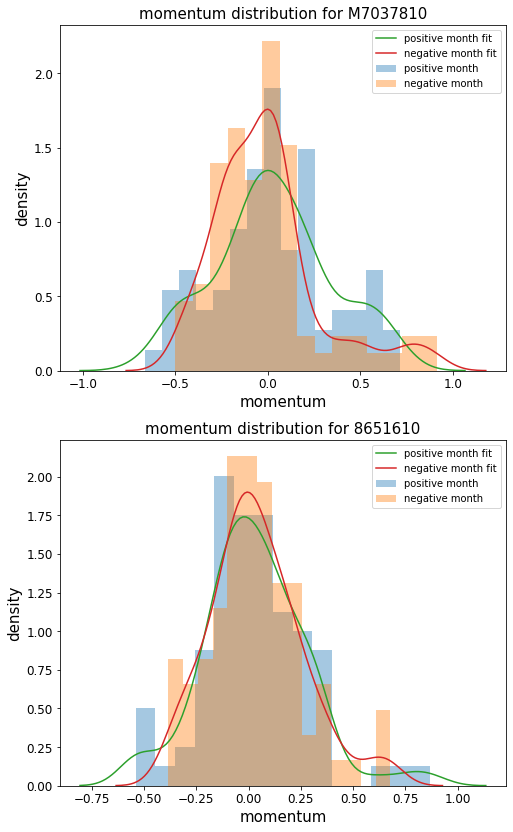

In [14]:
full_data["RETadj"] = full_data["PRCadj"].pct_change()
full_data_complete = full_data.dropna()

part_data_1 = full_data_complete[full_data_complete.CUSIP == "M7037810"].reset_index(drop=True)
part_data_2 = full_data_complete[full_data_complete.CUSIP == "8651610"].reset_index(drop=True)

def momentum_compare_plot(part_data):
    positive_mon = part_data[part_data.RETadj > 0]
    negative_mon = part_data[part_data.RETadj < 0]
    plt.hist(positive_mon["momentum"], bins=15, label="positive month",
             alpha=0.4, density=True)
    plt.hist(negative_mon["momentum"], bins=15, label="negative month",
             alpha=0.4, density=True)
    sns.kdeplot(positive_mon["momentum"], label="positive month fit")
    sns.kdeplot(negative_mon["momentum"], label="negative month fit")
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    font1 = {'size': 15,}
    
    plt.xlabel("momentum", font1)
    plt.ylabel("density", font1)
    
    plt.legend(loc="best")
    plt.title("momentum distribution for {}".format(part_data["CUSIP"][0]),
              fontsize=15)

plt.figure(figsize=(8, 14))
plt.subplot(211)
momentum_compare_plot(part_data_1)
plt.subplot(212)
momentum_compare_plot(part_data_2)
plt.show()